In [60]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [61]:
train_data = np.loadtxt('VSTrain.dt', delimiter=',')
test_data = np.loadtxt('VSTest.dt', delimiter=',')

def splitData(data):
    label = data[:,data.shape[1]-1]
    inputs = data[:,0:data.shape[1]-1]
    return inputs, label

train_inputs, train_label = splitData(train_data)
test_inputs, test_label = splitData(test_data)

total_data = 0
count_class = {}
for n in train_label:
    if n in count_class: 
        count_class[n] += 1
    else:
        count_class[n] = 1
    total_data += 1

count_class_se = pd.Series(count_class)
count_class_se.index.name = "class   frequency"
class_frequencies = count_class_se / total_data
print(class_frequencies)

class   frequency
0.0     0.088197
22.0    0.106355
17.0    0.033722
11.0    0.027237
24.0    0.041505
16.0    0.029831
23.0    0.088197
4.0     0.022049
10.0    0.011673
8.0     0.035019
21.0    0.009079
3.0     0.124514
6.0     0.077821
14.0    0.027237
9.0     0.075227
5.0     0.064851
13.0    0.011673
7.0     0.012970
1.0     0.028534
2.0     0.001297
15.0    0.033722
12.0    0.024643
19.0    0.012970
18.0    0.007782
20.0    0.003891
dtype: float64


In [67]:
# count_class: a dict (mapping from a class to the number of data points belonging to the class)
for key in count_class:
    if count_class[key] < 65:
        # index of classes will be deleted
        index_of_train_class = (train_label == key)
        # delete corresponding examples
        train_label = np.delete(train_label, index_of_train_class)
        train_inputs = np.delete(train_inputs, index_of_train_class, axis=0)
        
        # the same operations for test data 
        index_of_test_class = (test_label == key)
        test_label = np.delete(test_label, index_of_test_class)
        test_inputs = np.delete(test_inputs, index_of_test_class, axis=0)
     
print("remain classes: " + str(set(train_label)))
print("{} training examples remain".format(train_inputs.shape[0]))
print("{} test examples remain".format(test_inputs.shape[0]))

remain classes: {0.0, 3.0, 22.0, 23.0}
314 training examples remain
335 test examples remain


In [63]:
# compute the mean and standard deviation of the training features
mean_of_training = np.mean(train_inputs, axis=0) 
standard_of_training = np.std(train_inputs, axis=0)
# to normalize training data
norm_train_inputs = (train_inputs - mean_of_training) / standard_of_training

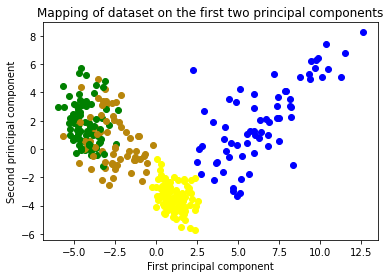

In [64]:
pca = PCA()
pca.fit(norm_train_inputs)

#Eigenvectors
eigvectors = pca.components_ 
# first two principal components
pca_1_2 = eigvectors[0:2, :]

# mapping training data
mapped_train_inputs = np.dot(norm_train_inputs, pca_1_2.T)

color_dict = {0.0: 'blue', 3.0: 'yellow', 22.0: 'green', 23.0: 'darkgoldenrod'}
for i in range(mapped_train_inputs.shape[0]):
    key = train_label[i]
    plt.scatter(mapped_train_inputs[i, 0], mapped_train_inputs[i, 1], marker='o', color=color_dict[key])
plt.title('Mapping of dataset on the first two principal components')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()
plt.close()

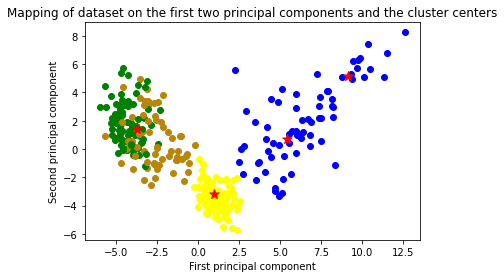

In [65]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(norm_train_inputs)
# project the cluster centers to the first two principal components(pca_1_2)
center = np.dot(kmeans.cluster_centers_, pca_1_2.T)

for i in range(mapped_train_inputs.shape[0]):
    key = train_label[i]
    plt.scatter(mapped_train_inputs[i, 0], mapped_train_inputs[i, 1], marker='o', color=color_dict[key])
plt.scatter(center[:,0], center[:,1], marker='*', color='red', s = 100)
plt.title('Mapping of dataset on the first two principal components and the cluster centers')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()
plt.close()